##   **Hyper-Parameter Tuning (Different Iterations)**

##   **1. Machine Learning Models**


###  **Model A - Random Forest Classifier**

*   **Finding the best hyperparameters with GridSearch CV and k-fold cross val.**

In [9]:
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

# Visualization
import seaborn as sns
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

import random
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
import plotly.offline as offline
import plotly.graph_objs as go

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import log_loss
from scipy.optimize import minimize
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn import model_selection 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


import warnings
warnings.filterwarnings('ignore')
import os

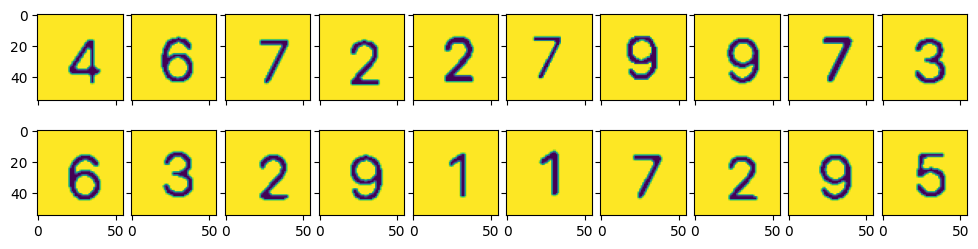

In [10]:
data = pd.read_csv("dataset_train.csv")

fig, ax = plt.subplots(2,10, figsize=(12, 3), sharex=True, sharey=True)
img_idx = np.random.choice(data.shape[0], 2*10)
for i, ax in enumerate(ax.flatten()):
    img = Image.fromarray(data.iloc[img_idx[i], :-1].values.reshape(55,-1).astype('uint8'))
    ax.imshow(img) # or ax.imshow(img, cmap='gray_r')

plt.subplots_adjust(hspace=0, wspace=0.1)    

plt.show()


In [3]:
label_column_name = 'label'
is_last_col_label = data.columns[-1] == label_column_name
print(is_last_col_label)

True


In [11]:

X = data.iloc[:, :-1]
y = data.iloc[:, -1]


### **Iteration 1**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
y_test

654     3
76      3
316     1
1347    8
571     3
       ..
582     3
1178    7
841     5
1067    6
233     9
Name: label, Length: 306, dtype: int64

In [53]:
# define the hyper-parametes 
param_grid = {
    'n_estimators' : [100, 200, 300], 
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

# define the model
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score from GridSearchCV: {grid_search.best_score_}")

best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")




Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END m

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        32
           2       1.00      0.97      0.99        35
           3       1.00      1.00      1.00        38
           4       0.96      1.00      0.98        22
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        38
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        30

    accuracy                           1.00       306
   macro avg       1.00      1.00      1.00       306
weighted avg       1.00      1.00      1.00       306



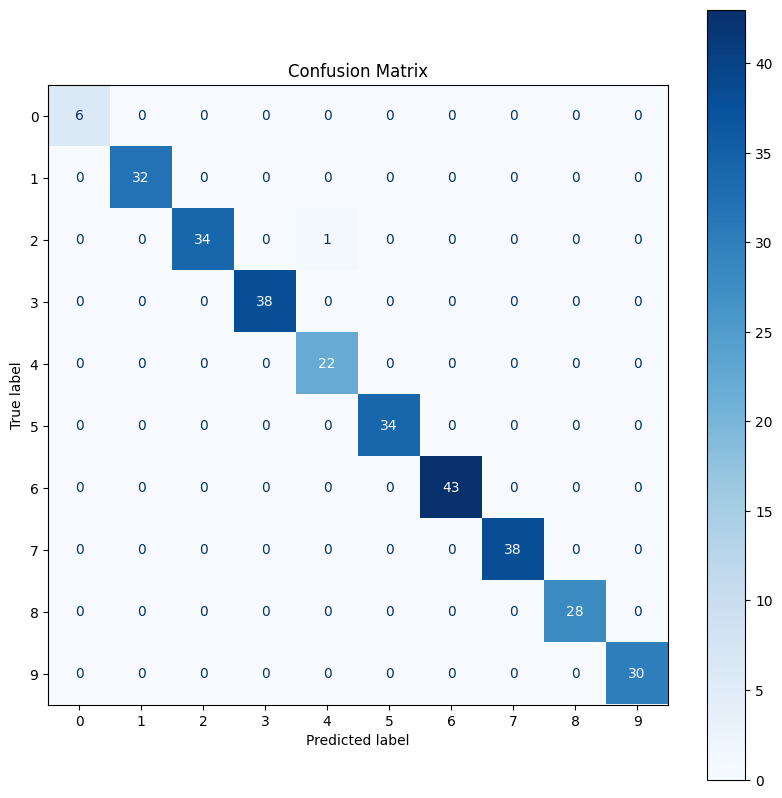

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title("Confusion Matrix")
plt.show()

*   **Label 0 is bad.**


### **Iteration 2**

In [12]:

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import pandas as pd

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


label
0    182
1    182
2    182
3    182
4    182
5    182
6    182
7    182
8    182
9    182
Name: count, dtype: int64


In [31]:
y_test

1510    9
990     6
135     6
408     2
591     3
       ..
534     2
711     4
432     2
1799    9
170     7
Name: label, Length: 364, dtype: int64

In [56]:
# define the hyper-parametes 
param_grid = {
    'n_estimators' : [100, 200, 300], 
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

# define the model
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score from GridSearchCV: {grid_search.best_score_}")

best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")




Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END m

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        35
           2       1.00      0.95      0.97        41
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        22
           7       0.95      1.00      0.97        39
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        34

    accuracy                           0.99       364
   macro avg       1.00      1.00      0.99       364
weighted avg       0.99      0.99      0.99       364



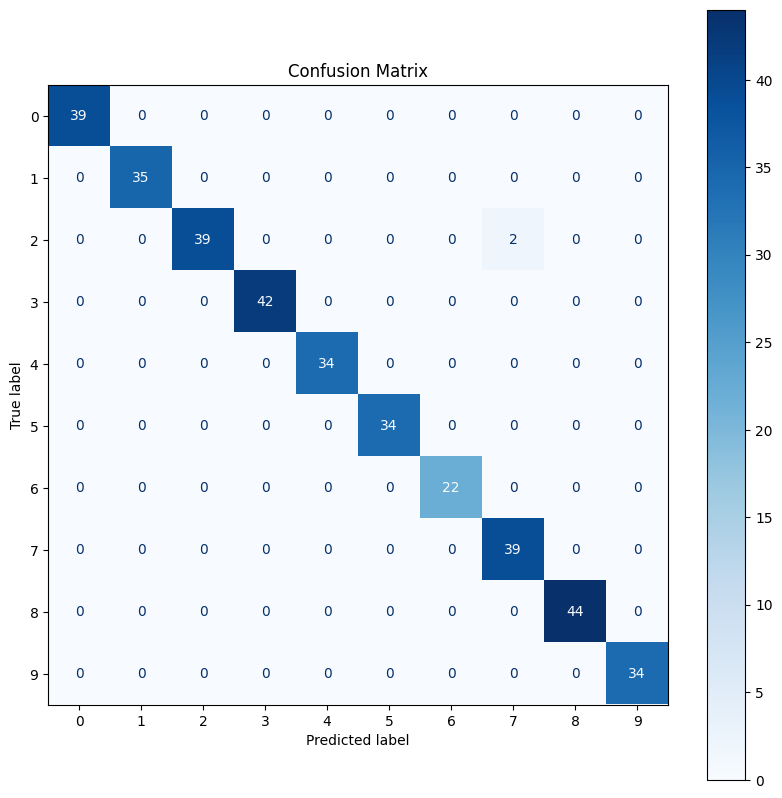

In [57]:

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title("Confusion Matrix")
plt.show()

* Based on both the iterations and the best hyper-parameters, I follow the third iteration with the following steps:

### **Iteration 3**

In [64]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

svc_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

svc_grid_search = GridSearchCV(SVC(probability=True), svc_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
svc_grid_search.fit(X_train, y_train)

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

print(f"SVC Best parameters: {svc_grid_search.best_params_}")
print(f"KNN Best parameters: {knn_grid_search.best_params_}")

best_svc = SVC(probability=True, **svc_grid_search.best_params_)
best_knn = KNeighborsClassifier(**knn_grid_search.best_params_)





Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   1.8s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   2.3s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   1.8s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   2.3s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   2.9s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   7.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   7.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   8.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   9.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   9.8s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=  14.6s
[CV] END .................C=0.1, gamma=scale, ke

SVC Test accuracy: 0.9972527472527473
SVC Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        35
           2       1.00      0.98      0.99        41
           3       0.98      1.00      0.99        42
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        39
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        34

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



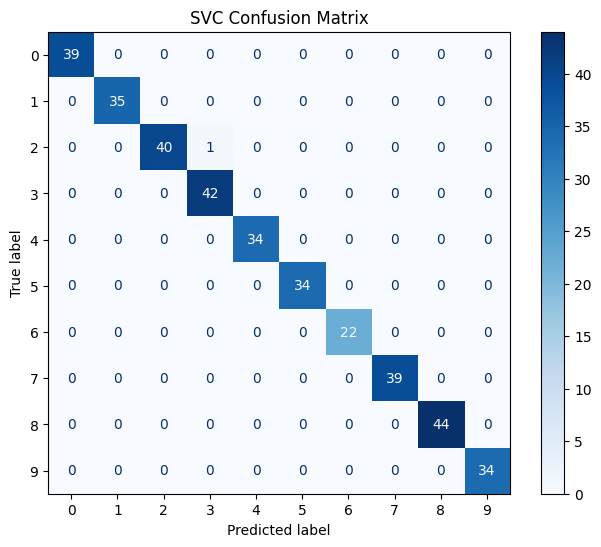

KNN Test accuracy: 0.9972527472527473
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        35
           2       1.00      0.98      0.99        41
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        22
           7       0.97      1.00      0.99        39
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        34

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



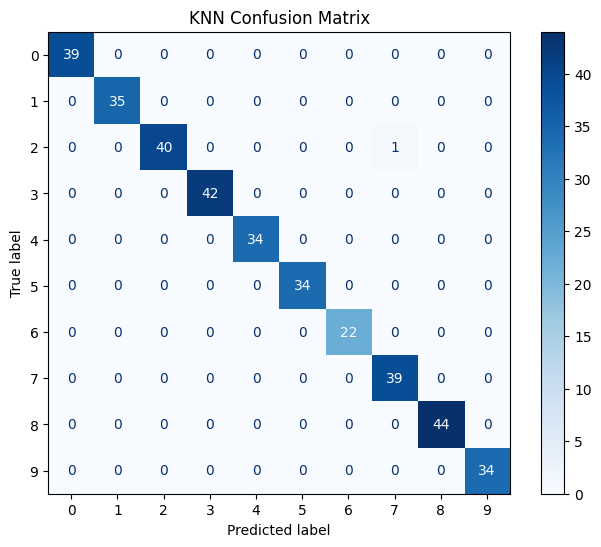

In [65]:
best_svc.fit(X_train, y_train)

y_pred_svc = best_svc.predict(X_test)

print(f"SVC Test accuracy: {accuracy_score(y_test, y_pred_svc)}")

print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svc, display_labels=best_svc.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title("SVC Confusion Matrix")
plt.show()

best_knn.fit(X_train, y_train)

y_pred_knn = best_knn.predict(X_test)

print(f"KNN Test accuracy: {accuracy_score(y_test, y_pred_knn)}")

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title("KNN Confusion Matrix")
plt.show()

### **Iteration 4**

Ensemble test accuracy: 0.9972527472527473
Ensemble Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        35
           2       1.00      0.98      0.99        41
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        22
           7       0.97      1.00      0.99        39
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        34

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



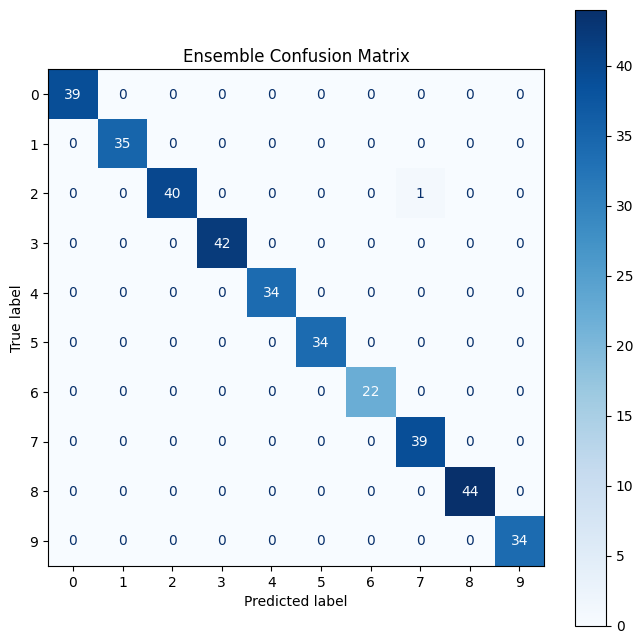

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

best_rf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=2,
    random_state=42
)

best_svc = SVC(
    C=1, 
    gamma='scale', 
    kernel='rbf', 
    probability=True
)

best_knn = KNeighborsClassifier(
    algorithm='auto', 
    n_neighbors=5, 
    weights='distance'
)

# Fit the models
best_rf.fit(X_train, y_train)
best_svc.fit(X_train, y_train)
best_knn.fit(X_train, y_train)

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('svc', best_svc),
        ('knn', best_knn)
    ],
    voting='soft',
    weights=[3, 1, 1]  # Start with equal weights
)


ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# ensemble model
print(f"Ensemble test accuracy: {accuracy_score(y_test, y_pred_ensemble)}")
print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# confusion matrix
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ensemble)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title("Ensemble Confusion Matrix")
plt.show()



###  **Model B - Xgboost Classifier**

*   **Finding the best hyperparameters with GridSearch CV and k-fold cross val.**

In [12]:

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import pandas as pd

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


label
0    182
1    182
2    182
3    182
4    182
5    182
6    182
7    182
8    182
9    182
Name: count, dtype: int64


### **Iteration 1 + GridSearch CV**

In [7]:
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss')

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# kFold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_log_loss', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best Params 

print(f"Best parameters found: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

# calc the accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100.0:.2f}%")

# calc the log loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   9.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   9.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   9.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   9.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   9.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=  10.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   9.9s
[CV] END 

F1 Score (Weighted): 0.9945033759018307
AUC-ROC (Weighted): 0.9999659782941517

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        35
           2       1.00      0.98      0.99        41
           3       1.00      1.00      1.00        42
           4       0.97      1.00      0.99        34
           5       1.00      0.97      0.99        34
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        39
           8       0.98      1.00      0.99        44
           9       1.00      1.00      1.00        34

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



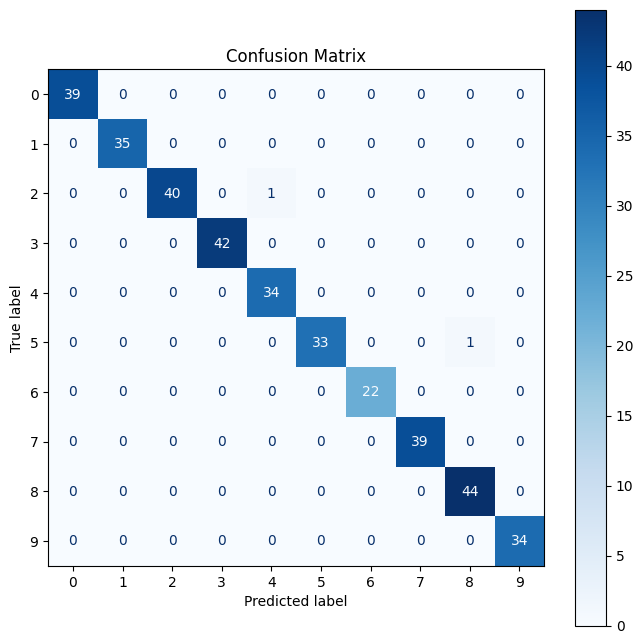

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))


f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (Weighted): {f1}")

roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr', average='weighted')
print(f"AUC-ROC (Weighted): {roc_auc}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_train))
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='.4g')
ax.set_title("Confusion Matrix")
plt.show()



### **Iteration 2 + Bayesian Optimization**

In [17]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import pandas as pd

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


label
0    182
1    182
2    182
3    182
4    182
5    182
6    182
7    182
8    182
9    182
Name: count, dtype: int64


In [18]:
from bayes_opt import BayesianOptimization
import numpy as np

In [22]:
def xgb_eval(n_estimators, max_depth, gamma, min_child_weight, subsample, colsample_bytree):
    params = {
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'n_estimators': int(n_estimators),
        'max_depth': int(max_depth),
        'gamma': gamma,
        'min_child_weight': min_child_weight,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'random_state': 42
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)
    # negative log loss
    return -log_loss(y_test, preds)

# define the hyper-parameters
pbounds = {
    'n_estimators': (100, 300),
    'max_depth': (3, 10),
    'gamma': (0, 5),
    'min_child_weight': (0, 5),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Bayesian Optimization
optimizer = BayesianOptimization(
    f=xgb_eval,
    pbounds=pbounds,
    random_state=42
)

# starting optimization
optimizer.maximize(init_points=2, n_iter=5)

best_params = optimizer.max['params']

# the params needs to be in int state
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

print(f"Best parameters found: {best_params}")

best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | -0.1854   | 0.7498    | 4.754     | 8.124     | 2.993     | 131.2     | 0.6624    |
| 2         | -0.1601   | 0.6232    | 4.331     | 7.208     | 3.54      | 104.1     | 0.988     |
| 3         | -0.1601   | 0.8987    | 3.915     | 6.516     | 3.958     | 105.1     | 0.8722    |
| 4         | -0.1403   | 0.719     | 3.599     | 5.209     | 2.308     | 299.9     | 0.7961    |
| 5         | -0.1029   | 0.809     | 0.6353    | 6.266     | 0.9809    | 275.8     | 0.9741    |
| 6         | -0.08072  | 0.7862    | 0.0       | 6.19      | 2.604     | 250.0     | 1.0       |
| 7         | -0.2009   | 1.0       | 5.0       | 3.0       | 0.0       | 216.9     | 0.6       |
Best parameters found: {'colsample_bytree': 0.7862207642208184, 'gamma': 0.0, 'max_depth': 6, 'min_child_weight': 2.60

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        35
           2       1.00      0.98      0.99        41
           3       0.98      1.00      0.99        42
           4       1.00      1.00      1.00        34
           5       1.00      0.97      0.99        34
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        39
           8       0.98      1.00      0.99        44
           9       1.00      1.00      1.00        34

    accuracy                           0.99       364
   macro avg       1.00      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



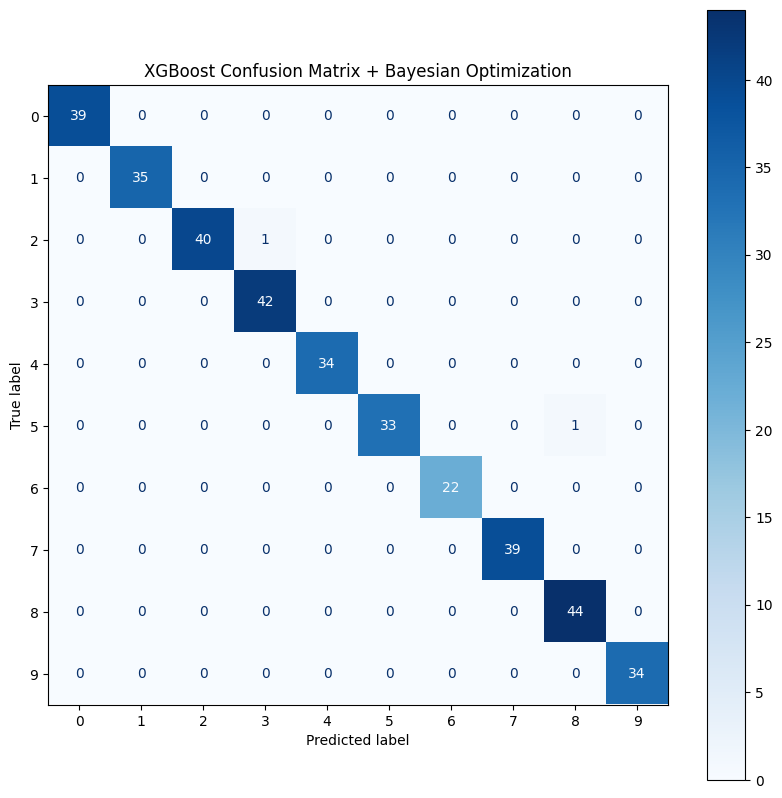

In [13]:
from sklearn.preprocessing import label_binarize

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title("XGBoost Confusion Matrix + Bayesian Optimization")
plt.show()

In [25]:
y_test

1       1
8       1
13      1
14      1
20      1
       ..
1787    8
1790    8
1801    9
1802    9
1816    9
Name: label, Length: 364, dtype: int64

##  **Iteration 3 + Best Hyper-Params from GridSearch CV + KFold Results**

Fold 1: Accuracy = 0.9967, Log Loss = 0.0218
Fold 2: Accuracy = 0.9935, Log Loss = 0.0296
Fold 3: Accuracy = 0.9869, Log Loss = 0.0573
Fold 4: Accuracy = 0.9967, Log Loss = 0.0283
Fold 5: Accuracy = 0.9804, Log Loss = 0.0771

Best Fold: 1
Best Fold Accuracy: 0.9967
Best Fold Log Loss: 0.0218

Classification Report for Best Fold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        32
           2       1.00      0.97      0.99        35
           3       1.00      1.00      1.00        38
           4       0.96      1.00      0.98        22
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        38
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        30

    accuracy                           1.00       306
   macro avg       

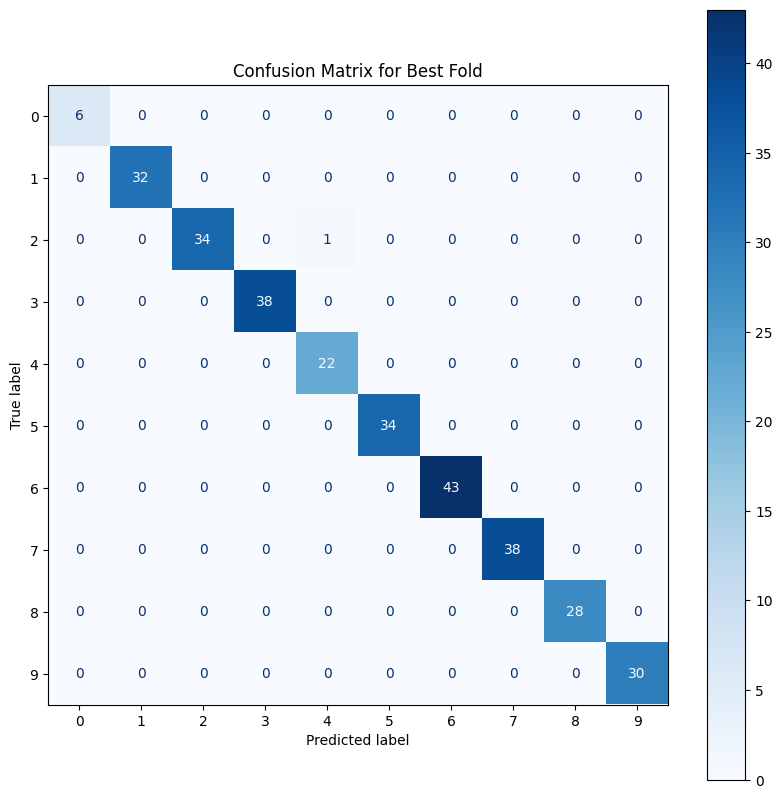

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, log_loss
from xgboost import XGBClassifier
import numpy as np

best_params = {
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'colsample_bytree': 0.8,
    'learning_rate': 0.2,
    'max_depth': 8,
    'n_estimators': 300,
    'subsample': 0.8,
    'random_state': 42
}

best_model = XGBClassifier(**best_params)

best_accuracy = 0
best_logloss = np.inf
best_fold_index = -1

#  K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#  K-Fold CV to find the best subset
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    
    # Train the model and fit it on the training data
    best_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba)
    
    print(f"Fold {i+1}: Accuracy = {accuracy:.4f}, Log Loss = {logloss:.4f}")
    
    #  Check if the current fold is the best so far. 
    if logloss < best_logloss:
        best_logloss = logloss
        best_accuracy = accuracy
        best_fold_index = i
        best_y_test = y_test
        best_y_pred = y_pred
i

# Output for the best fold and its eval metrices
print(f"\nBest Fold: {best_fold_index+1}")
print(f"Best Fold Accuracy: {best_accuracy:.4f}")
print(f"Best Fold Log Loss: {best_logloss:.4f}")

if best_y_test is not None and best_y_pred is not None:
    print("\nClassification Report for Best Fold:")
    print(classification_report(best_y_test, best_y_pred))
    
    conf_matrix = confusion_matrix(best_y_test, best_y_pred)
    fig, ax = plt.subplots(figsize=(10, 10))  
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_resampled))
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title("Confusion Matrix for Best Fold")
    plt.show()


##  **Iteration 4 + Aggregated Model Results**

In [17]:
# Initialize the model with the best hyperparameters
best_params = {
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'colsample_bytree': 0.8,
    'learning_rate': 0.2,
    'max_depth': 8,
    'n_estimators': 300,
    'subsample': 0.8,
    'random_state': 42
}

In [19]:

model = XGBClassifier(**best_params)

# Setup K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store fold predictions
y_pred_proba_folds = []

# Perform K-Fold CV
for train_index, test_index in kf.split(X):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Store probability predictions for each fold
    y_pred_proba_folds.append(model.predict_proba(X_test))


In [20]:
y_pred_proba_aggregated = np.mean(np.array(y_pred_proba_folds), axis=0)


In [21]:
y_pred_aggregated = np.argmax(y_pred_proba_aggregated, axis=1)


In [22]:
accuracy = accuracy_score(y_test, y_pred_aggregated)  # Note: y_test needs to be handled as noted above
logloss = log_loss(y_test, y_pred_proba_aggregated)


In [23]:
print(f"Aggregated Model Accuracy: {accuracy:.4f}")
print(f"Aggregated Model Log Loss: {logloss:.4f}")

# Classification Report
print("\nClassification Report for Aggregated Model:")
print(classification_report(y_test, y_pred_aggregated))

Aggregated Model Accuracy: 0.5915
Aggregated Model Log Loss: 0.6565

Classification Report for Aggregated Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.62      1.00      0.77        25
           2       0.71      0.67      0.69        33
           3       0.44      0.69      0.54        29
           4       0.48      0.41      0.44        34
           5       0.42      0.47      0.44        32
           6       0.39      0.35      0.37        37
           7       0.59      0.57      0.58        35
           8       0.87      0.62      0.72        42
           9       1.00      0.74      0.85        35

    accuracy                           0.59       306
   macro avg       0.55      0.55      0.54       306
weighted avg       0.62      0.59      0.59       306



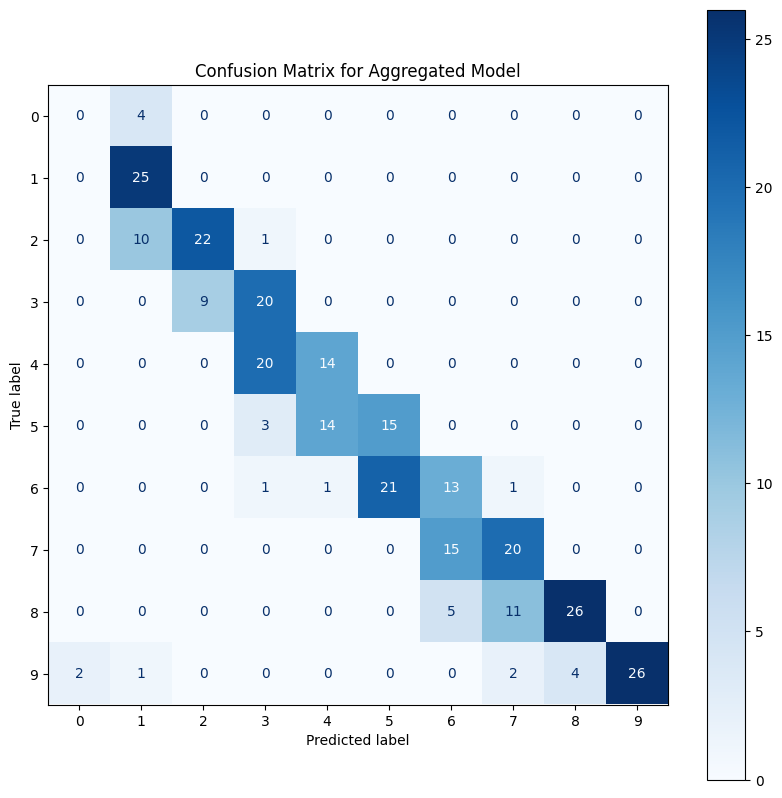

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred_aggregated)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_resampled))
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title("Confusion Matrix for Aggregated Model")
plt.show()

##  **Iteration 5 + Bayesian Optimisation with K-Fold**

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_resampled and y_resampled are your dataset's features and labels after resampling

# Best parameters from Bayesian Optimization
best_params = {
    'colsample_bytree': 0.9158337837301258,
    'gamma': 2.67754457515633,
    'max_depth': 9,
    'min_child_weight': 2.2867603199168607,
    'n_estimators': 184,
    'subsample': 0.8615305915574019,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'random_state': 42
}

# Initialize the model with the best hyperparameters
best_model = XGBClassifier(**best_params)

# Setup K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Variables for storing metrics
fold_accuracies = []
fold_log_losses = []

# Perform K-Fold CV
for i, (train_index, test_index) in enumerate(kf.split(X_resampled)):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    
    # Fit the model
    best_model.fit(X_train, y_train)
    
    # Predictions
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    log_loss_val = log_loss(y_test, y_pred_proba)
    
    fold_accuracies.append(accuracy)
    fold_log_losses.append(log_loss_val)
    
    print(f"Fold {i+1}: Accuracy = {accuracy:.4f}, Log Loss = {log_loss_val:.4f}")

# Average metrics across folds
avg_accuracy = np.mean(fold_accuracies)
avg_log_loss = np.mean(fold_log_losses)

print(f"\nAverage Accuracy across folds: {avg_accuracy:.4f}")
print(f"Average Log Loss across folds: {avg_log_loss:.4f}")

# Since classification report and confusion matrix require specific folds, here is an example using the last fold
print("\nClassification Report for Last Fold:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_resampled))
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title("Confusion Matrix for Last Fold")
plt.show()


NameError: name 'X_resampled' is not defined

In [23]:
X_test.shape

(364, 3025)

In [24]:
y_test.shape

(364,)

##  **Model C - MLP**

*   **Finding the best hyperparameters with GridSearch CV and k-fold cross val.**

In [13]:
from tensorflow.keras.utils import to_categorical
import numpy as np
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

### **Iteration 1**

In [14]:
!pip install hyperopt


In [15]:

X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [16]:

y_one_hot = to_categorical(y_resampled)



In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_one_hot, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)


In [19]:
from sklearn.decomposition import PCA

pca_200 = PCA(n_components=300)
pca_200.fit(X_train_norm)
X_train_pca = pca_200.transform(X_train_norm)
X_test_pca = pca_200.transform(X_test_norm)

# verify shape after PCA
print("Train images shape:", X_train_pca.shape)
print("Test images shape: ", X_test_pca.shape)

# get exact variability retained
print("\nVar retained (%):", 
      np.sum(pca_200.explained_variance_ratio_ * 100))

Train images shape: (1456, 300)
Test images shape:  (364, 300)

Var retained (%): 99.56839688327057


In [20]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.regularizers import l2


def objective(params):
    # hyperparameters 
    model = Sequential([
        InputLayer(input_shape=(300,)),
        Dense(units=int(params['units1']), activation='relu', kernel_regularizer=l2(params['l2_1'])),
        Dropout(params['dropout_1']),
        Dense(units=int(params['units2']), activation='relu', kernel_regularizer=l2(params['l2_2'])),
        Dropout(params['dropout_2']),
        Dense(units=int(params['units3']), activation='relu', kernel_regularizer=l2(params['l2_3'])),
        Dropout(params['dropout_3']),
        Dense(10, activation='softmax')
    ])
    
    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=params['optimizer'],
        metrics=['accuracy']
    )
    
    # Fit the model
    history = model.fit(
        X_train_pca, y_train,
        epochs=20,  # You could also optimize the number of epochs
        batch_size=int(params['batch_size']),
        verbose=0,
        validation_split=0.15
    )
    
    # Evaluate the model
    val_loss = history.history['val_loss'][-1]  # Use the last validation loss
    return {'loss': val_loss, 'status': STATUS_OK}

    trials.append(params.copy())
    trials.append({'loss': val_loss, 'status': STATUS_OK})

    # We print the best parameters so far
    print("Best parameters so far:")
    print(min(trials.results, key=lambda x: x['loss']))

    return {'loss': val_loss, 'status': STATUS_OK, 'params': params}

#  space of hyperparameters to search
space = {
    'units1': hp.quniform('units1', 32, 128, 1),
    'units2': hp.quniform('units2', 16, 64, 1),
    'units3': hp.quniform('units3', 32, 128, 1),
    'dropout_1': hp.uniform('dropout_1', 0.3, 0.7),
    'dropout_2': hp.uniform('dropout_2', 0.3, 0.7),
    'dropout_3': hp.uniform('dropout_3', 0.3, 0.7),
    'l2_1': hp.loguniform('l2_1', np.log(1e-5), np.log(1e-2)),
    'l2_2': hp.loguniform('l2_2', np.log(1e-5), np.log(1e-2)),
    'l2_3': hp.loguniform('l2_3', np.log(1e-5), np.log(1e-2)),
    'optimizer': hp.choice('optimizer', ['adam', 'sgd']),
    'batch_size': hp.quniform('batch_size', 64, 256, 1)
}

# Start the hyperparameter optimization process
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=75,  
    trials=trials
)

print("Best parameters:")
print(best)



  0%|          | 0/75 [00:00<?, ?trial/s, best loss=?]

2024-04-01 00:20:37.353888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-01 00:20:37.878912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1%|▏         | 1/75 [00:03<04:04,  3.30s/trial, best loss: 0.5452063679695129]

2024-04-01 00:20:40.624153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-01 00:20:41.121837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1%|▏         | 1/75 [00:07<09:35,  7.78s/trial, best loss: 0.5452063679695129]


KeyboardInterrupt: 

### **Iteration 2**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Hyperparameters from tuning
batch_size = int(153)
dropout_1 = 0.315466728419895
dropout_2 = 0.30135162620408623
dropout_3 = 0.3142666529964194
l2_1 = 3.850837414921736e-05
l2_2 = 4.4023809916155655e-05
l2_3 = 0.0002966538783423139
units1 = int(41)
units2 = int(50)
units3 = int(57)
optimizer = 'adam'  # Index 0 corresponds to 'adam' as per hyperparameter tuning results


In [22]:
MLP = Sequential([
    InputLayer(input_shape=(300,)),  # Assuming the input shape from the hyperparameters is correct
    Dense(units=units1, activation='relu', kernel_regularizer=l2(l2_1)),
    Dropout(dropout_1),
    Dense(units=units2, activation='relu', kernel_regularizer=l2(l2_2)),
    Dropout(dropout_2),
    Dense(units=units3, activation='relu', kernel_regularizer=l2(l2_3)),
    Dropout(dropout_3),
    Dense(10, activation='softmax')  # Assuming 10 classes for the output layer
])


In [23]:
MLP.compile(loss='categorical_crossentropy',
            optimizer=optimizer,  # Using the chosen optimizer from hyperparameter tuning
            metrics=['accuracy'])


In [24]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
]

In [25]:
# Training (fit) with the new batch size
history = MLP.fit(X_train_pca, y_train, 
                  epochs=20, 
                  batch_size=batch_size, 
                  verbose=1,
                  validation_split=0.15, 
                  callbacks=callbacks)

Epoch 1/20


2024-04-01 00:20:56.008522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 1s 55ms/step - loss: 5.9431 - accuracy: 0.1479 - val_loss: 2.7141 - val_accuracy: 0.3379
Epoch 2/20
4/9 [============>.................] - ETA: 0s - loss: 4.7552 - accuracy: 0.2418

2024-04-01 00:20:56.542110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 29ms/step - loss: 4.5702 - accuracy: 0.2490 - val_loss: 1.7818 - val_accuracy: 0.5023
Epoch 3/20
9/9 [==============================] - 0s 37ms/step - loss: 3.5608 - accuracy: 0.3226 - val_loss: 1.2769 - val_accuracy: 0.6393
Epoch 4/20
9/9 [==============================] - 0s 30ms/step - loss: 2.9118 - accuracy: 0.4244 - val_loss: 0.9793 - val_accuracy: 0.7489
Epoch 5/20
9/9 [==============================] - 0s 26ms/step - loss: 2.5056 - accuracy: 0.4745 - val_loss: 0.7997 - val_accuracy: 0.8219
Epoch 6/20
9/9 [==============================] - 0s 26ms/step - loss: 2.1515 - accuracy: 0.5505 - val_loss: 0.6816 - val_accuracy: 0.8767
Epoch 7/20
9/9 [==============================] - 0s 26ms/step - loss: 2.0803 - accuracy: 0.5578 - val_loss: 0.5948 - val_accuracy: 0.8858
Epoch 8/20
9/9 [==============================] - 0s 28ms/step - loss: 1.8615 - accuracy: 0.5877 - val_loss: 0.5275 - val_accuracy: 0.9087
Epoch 9/20
9/9 [======================

In [26]:
test_loss, test_acc = MLP.evaluate(X_test_pca, y_test,
                                   batch_size=batch_size,
                                   verbose=0)


In [27]:

print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

MLP.summary()

Test loss: 0.629608690738678
Test accuracy: 0.9642857313156128
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 41)                12341     
                                                                 
 dropout_9 (Dropout)         (None, 41)                0         
                                                                 
 dense_13 (Dense)            (None, 50)                2100      
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 57)                2907      
                                                                 
 dropout_11 (Dropout)        (None, 57)                0         
                                                         

12/12 [==============================] - 0s 3ms/step


2024-04-01 00:21:07.751883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      1.00      0.99        35
           2       1.00      0.93      0.96        41
           3       0.95      0.86      0.90        42
           4       1.00      1.00      1.00        34
           5       0.85      0.97      0.90        34
           6       0.96      1.00      0.98        22
           7       1.00      1.00      1.00        39
           8       0.95      0.93      0.94        44
           9       0.97      1.00      0.99        34

    accuracy                           0.96       364
   macro avg       0.96      0.97      0.97       364
weighted avg       0.97      0.96      0.96       364

Log loss: 0.22837007798607328


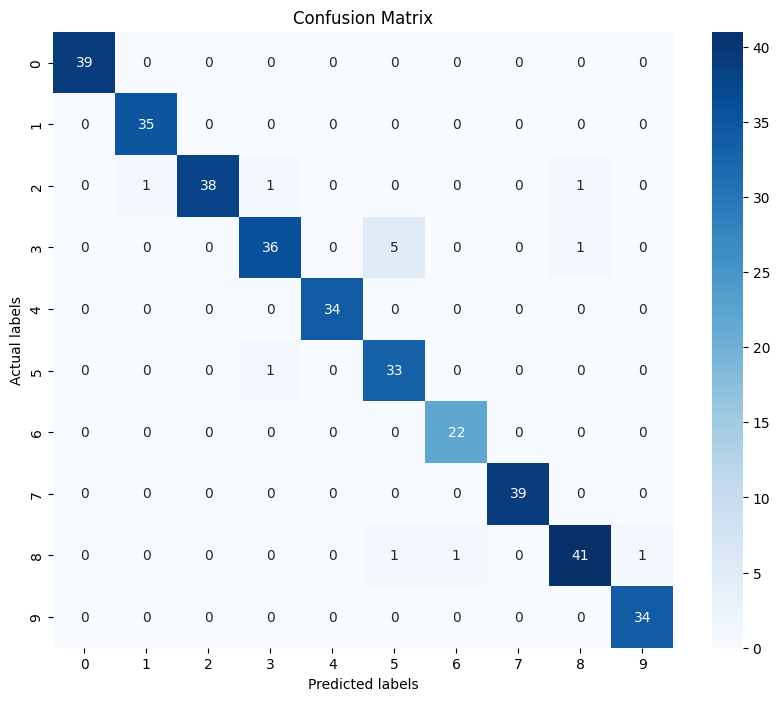

In [28]:

y_pred_probs = MLP.predict(X_test_pca)

y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

#  the classification report
print(classification_report(y_true_classes, y_pred_classes))

#  log loss
loss = log_loss(y_test, y_pred_probs)
print(f"Log loss: {loss}")

#  the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

#  the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()
